In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msgn
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from missingpy import MissForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import json
%matplotlib inline

In [7]:
with open('C:\\Users\\sdes343\\Documents\\RA job\\config.json') as json_file:
    config = json.load(json_file)

In [51]:
config['step2'][0][1:]

['ebit', 'ebitda', 'gp', 'oibdp', 'sale', 'cogs', 'xsga', 'dp']

In [10]:
df = pd.read_csv(config['input_file'])

In [16]:
df.shape

(311600, 99)

### Check the proportion of missing values in the  original dataset 

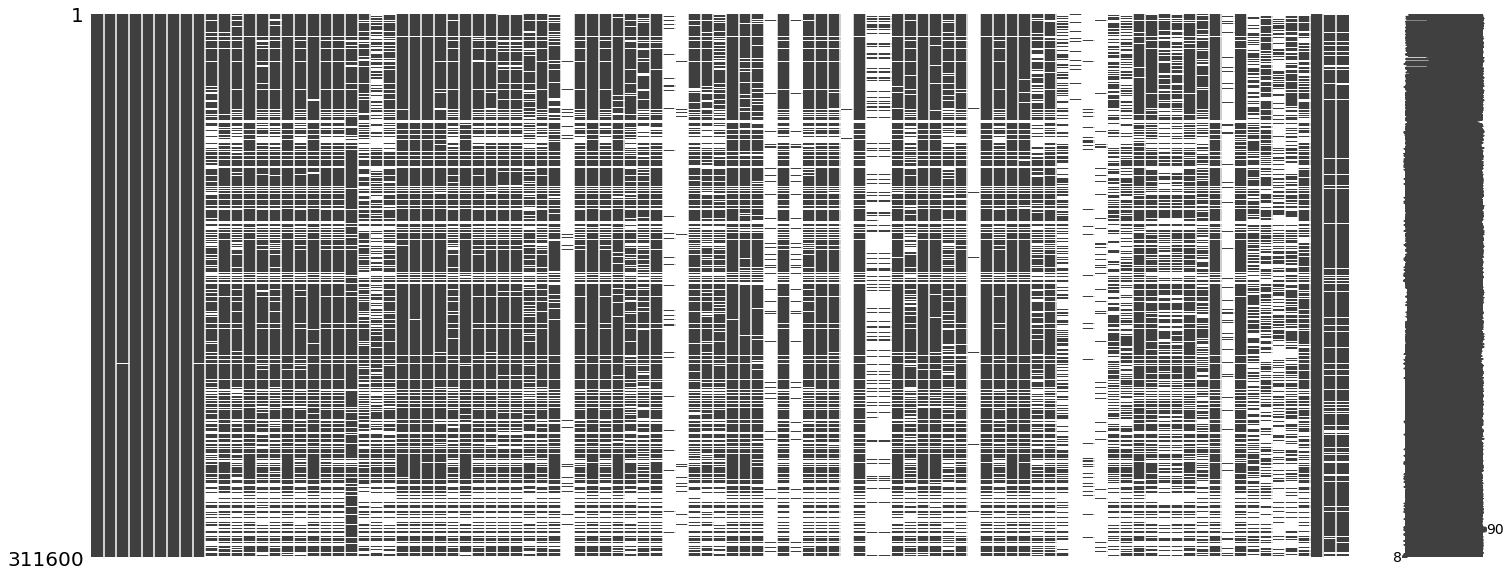

In [17]:
msgn.matrix(df)

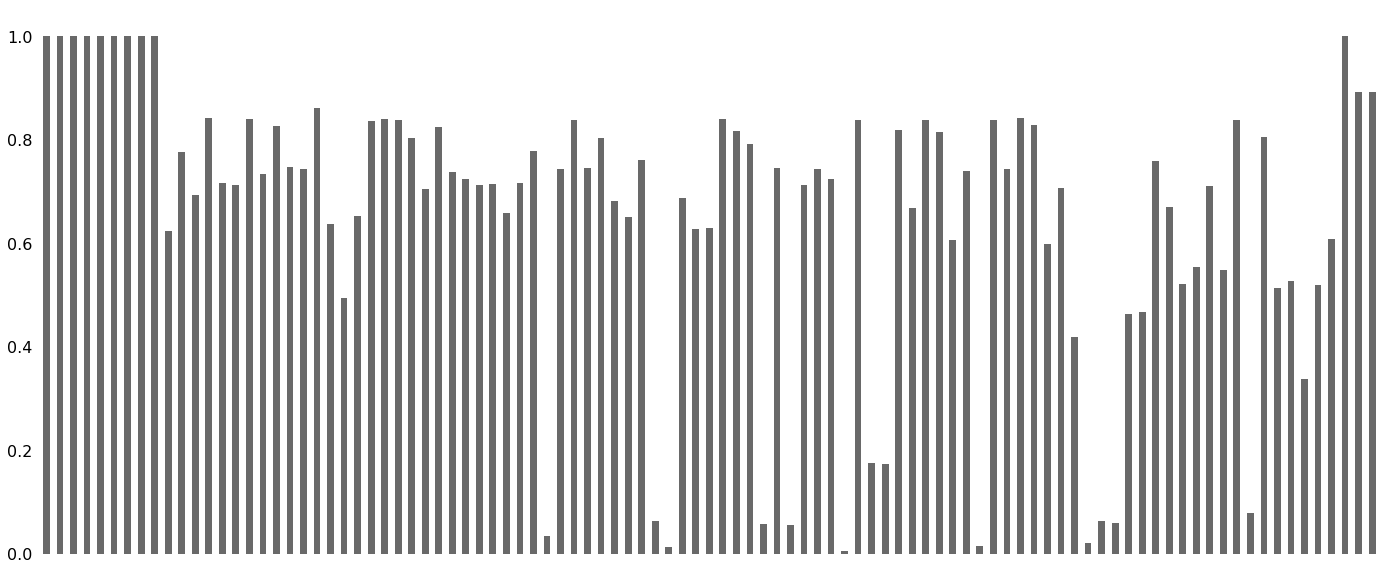

In [18]:
msgn.bar(df)

### Find which columns have more than 75% data missing

In [19]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
gvkey,gvkey,0.000000
datadate,datadate,0.000000
indfmt,indfmt,0.000000
consol,consol,0.000000
popsrc,popsrc,0.000000
datafmt,datafmt,0.000000
costat,costat,0.000000
fyear,fyear,0.034981
curcd,curcd,0.034981
tic,tic,0.053273


In [20]:
subset = list(missing_value_df.column_name[missing_value_df.percent_missing > 75])

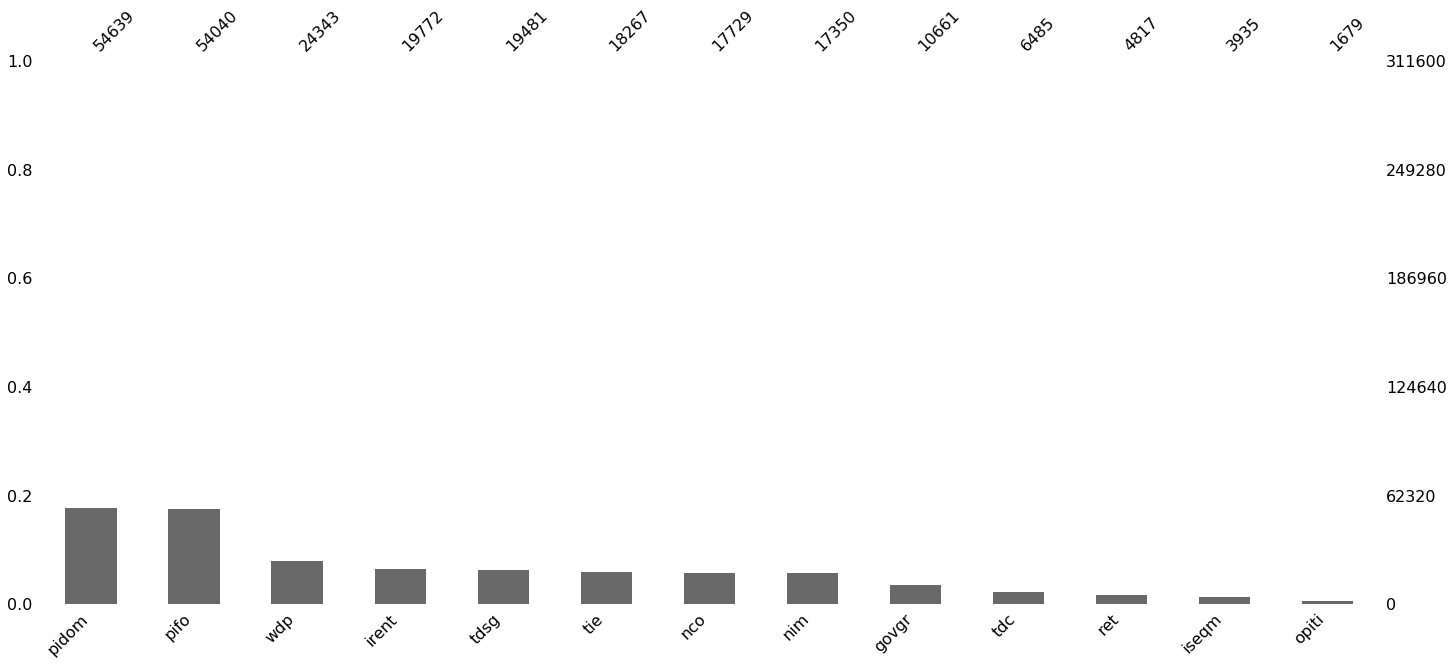

In [21]:
msgn.bar(df[subset])

### Filter out the variables with more than 75% data missing

In [22]:
df1 = df.drop(subset,axis=1)

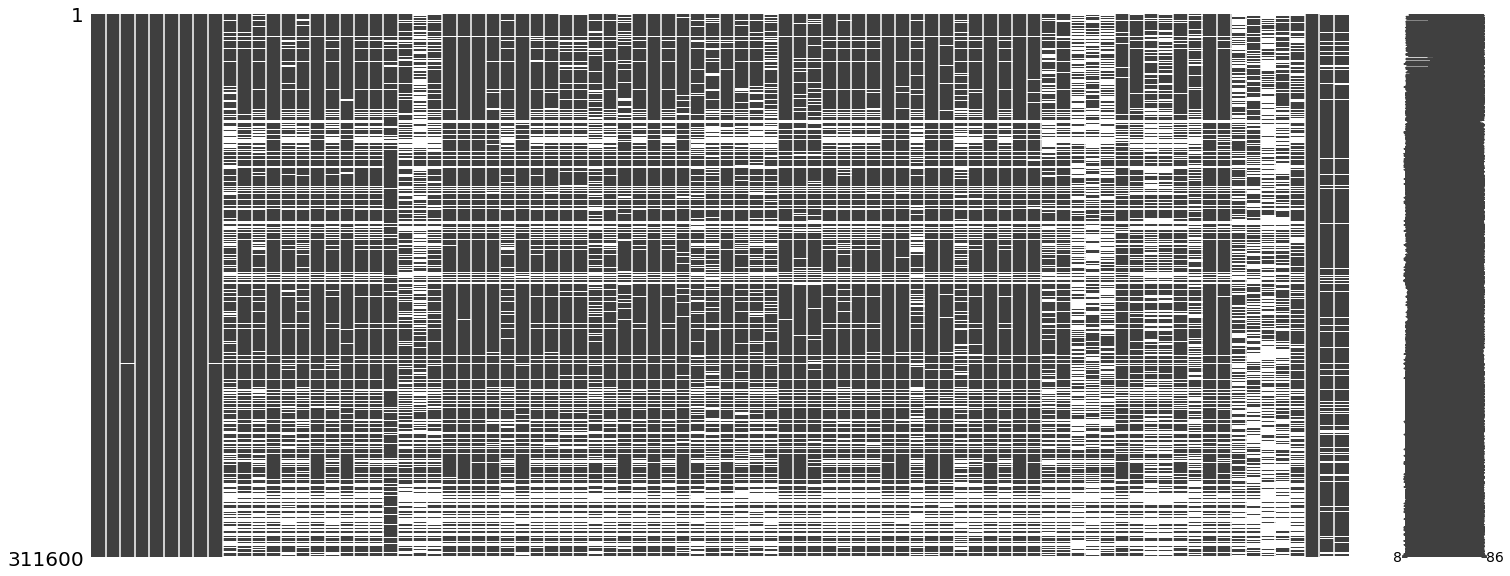

In [23]:
msgn.matrix(df1)

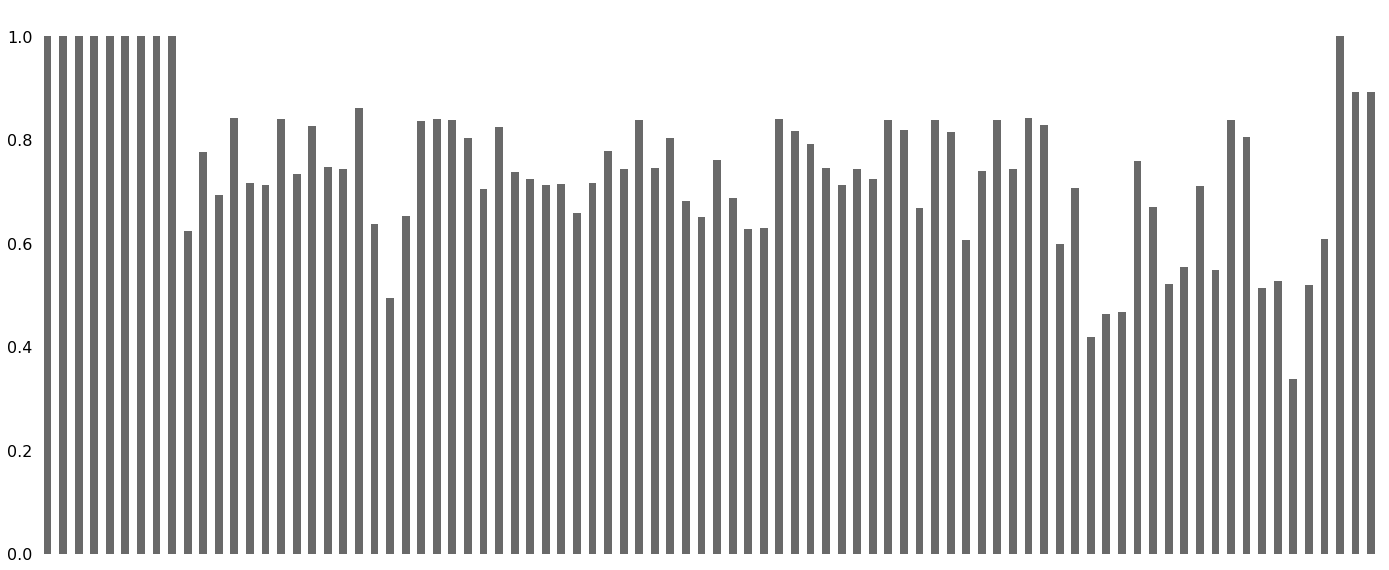

In [24]:
msgn.bar(df1)

In [25]:
print(list(df1.columns))

['gvkey', 'datadate', 'fyear', 'indfmt', 'consol', 'popsrc', 'datafmt', 'tic', 'curcd', 'act', 'ap', 'aqc', 'at', 'bkvlps', 'capx', 'ceq', 'ceqt', 'ch', 'che', 'cogs', 'csho', 'dc', 'dcom', 'dd', 'dlc', 'dltt', 'do', 'dp', 'dv', 'dvt', 'ebit', 'ebitda', 'epsfx', 'epspx', 'esub', 'fopo', 'gdwl', 'gp', 'ib', 'ibcom', 'intan', 'intc', 'invch', 'invt', 'ivch', 'lct', 'lifr', 'lt', 'mib', 'mii', 'ni', 'oancf', 'oiadp', 'oibdp', 'pi', 'ppent', 'prstkc', 'pstk', 're', 'recch', 'rect', 'revt', 'sale', 'seq', 'spi', 'sppe', 'sstk', 'stkco', 'tlcf', 'txbco', 'txdb', 'txdi', 'txfed', 'txfo', 'txp', 'txpd', 'txt', 'xi', 'xpp', 'xpr', 'xrd', 'xrent', 'xsga', 'costat', 'prcc_c', 'prcc_f']


### Find correlations between variables to build empirical models

In [26]:
df1[config['step2'][0]].corr()

,oiadp,ebit,ebitda,gp,oibdp,sale,cogs,xsga,dp
oiadp,1.000000,1.000000,0.963528,0.863406,0.963528,0.646697,0.480168,0.668941,0.486161
ebit,1.000000,1.000000,0.963473,0.863060,0.963473,0.646435,0.480175,0.668401,0.486538
ebitda,0.963528,0.963473,1.000000,0.924786,1.000000,0.758729,0.602891,0.737288,0.702480
gp,0.863406,0.863060,0.924786,1.000000,0.924786,0.826701,0.659628,0.924439,0.722902
oibdp,0.963528,0.963473,1.000000,0.924786,1.000000,0.758729,0.602891,0.737288,0.702480
sale,0.646697,0.646435,0.758729,0.826701,0.758729,1.000000,0.968192,0.784787,0.751285
cogs,0.480168,0.480175,0.602891,0.659628,0.602891,0.968192,1.000000,0.642874,0.683225
xsga,0.668941,0.668401,0.737288,0.924439,0.737288,0.784787,0.642874,1.000000,0.650097
dp,0.486161,0.486538,0.702480,0.722902,0.702480,0.751285,0.683225,0.650097,1.000000


In [27]:
df1[config['step2'][1]].corr()

,pi,ebitda,oiadp,txt,spi
pi,1.000000,0.773873,0.750143,0.750486,0.237151
ebitda,0.773873,1.000000,0.963528,0.649695,-0.118053
oiadp,0.750143,0.963528,1.000000,0.607891,-0.086980
txt,0.750486,0.649695,0.607891,1.000000,0.007851
spi,0.237151,-0.118053,-0.086980,0.007851,1.000000


In [28]:
df1[config['step2'][2]].corr()

,che,ch,dlc,xrd
che,1.000000,0.715503,0.764664,0.751462
ch,0.715503,1.000000,0.444629,0.631825
dlc,0.764664,0.444629,1.000000,0.387790
xrd,0.751462,0.631825,0.387790,1.000000


In [29]:
df1[config['step2'][3]].corr()

,ceq,ceqt,ebitda,gp,oibdp,re,seq
ceq,1.000000,0.757051,0.746709,0.755258,0.746709,0.844672,0.983632
ceqt,0.757051,1.000000,0.513358,0.483857,0.513358,0.707321,0.740953
ebitda,0.746709,0.513358,1.000000,0.924786,1.000000,0.626170,0.792131
gp,0.755258,0.483857,0.924786,1.000000,0.924786,0.631465,0.791352
oibdp,0.746709,0.513358,1.000000,0.924786,1.000000,0.626170,0.792131
re,0.844672,0.707321,0.626170,0.631465,0.626170,1.000000,0.820913
seq,0.983632,0.740953,0.792131,0.791352,0.792131,0.820913,1.000000


In [30]:
df1[config['step2'][4]].corr()

,act,capx,ceq,ch,cogs,dp,ebitda,gp,oancf,oibdp,rect,invt,xsga
act,1.000000,0.713516,0.774739,0.833620,0.757707,0.730143,0.794715,0.826177,0.781804,0.794715,0.908919,0.770312,0.760522
capx,0.713516,1.000000,0.662029,0.194461,0.674670,0.855838,0.673545,0.652614,0.562690,0.673545,0.105547,0.131061,0.547455
ceq,0.774739,0.662029,1.000000,0.491338,0.619814,0.665482,0.746709,0.755258,0.622899,0.746709,0.342837,0.262347,0.691694
ch,0.833620,0.194461,0.491338,1.000000,0.214183,0.209783,0.415043,0.399068,0.357765,0.415043,0.501414,0.229473,0.290459
cogs,0.757707,0.674670,0.619814,0.214183,1.000000,0.683225,0.602891,0.659628,0.496221,0.602891,0.153291,0.202851,0.642874
dp,0.730143,0.855838,0.665482,0.209783,0.683225,1.000000,0.702480,0.722902,0.585990,0.702480,0.141791,0.139825,0.650097
ebitda,0.794715,0.673545,0.746709,0.415043,0.602891,0.702480,1.000000,0.924786,0.602915,1.000000,0.587500,0.327633,0.737288
gp,0.826177,0.652614,0.755258,0.399068,0.659628,0.722902,0.924786,1.000000,0.611284,0.924786,0.501201,0.283390,0.924439
oancf,0.781804,0.562690,0.622899,0.357765,0.496221,0.585990,0.602915,0.611284,1.000000,0.602915,0.232692,0.093955,0.546803
oibdp,0.794715,0.673545,0.746709,0.415043,0.602891,0.702480,1.000000,0.924786,0.602915,1.000000,0.587500,0.327633,0.737288


In [31]:
df1[config['step2'][5]].corr()

,at,act,ap,che,dlc,ebit,rect,intan
at,1.000000,0.876029,0.780556,0.829195,0.759211,0.722028,0.892013,0.358389
act,0.876029,1.000000,0.800376,0.827484,0.739808,0.725537,0.908919,0.478772
ap,0.780556,0.800376,1.000000,0.792584,0.591446,0.488476,0.730631,0.222512
che,0.829195,0.827484,0.792584,1.000000,0.764664,0.577141,0.632357,0.239605
dlc,0.759211,0.739808,0.591446,0.764664,1.000000,0.588625,0.616644,0.267033
ebit,0.722028,0.725537,0.488476,0.577141,0.588625,1.000000,0.675196,0.449068
rect,0.892013,0.908919,0.730631,0.632357,0.616644,0.675196,1.000000,0.193893
intan,0.358389,0.478772,0.222512,0.239605,0.267033,0.449068,0.193893,1.000000


In [32]:
df1[config['step2'][6]].corr()

,dltt,pstk,rect
dltt,1.000000,0.912701,0.798392
pstk,0.912701,1.000000,0.705521
rect,0.798392,0.705521,1.000000


In [35]:
df1[config['step2'][7]].corr()

,dvt,dv,ebitda,gp
dvt,1.000000,0.938431,0.711169,0.700122
dv,0.938431,1.000000,0.749497,0.728762
ebitda,0.711169,0.749497,1.000000,0.924786
gp,0.700122,0.728762,0.924786,1.000000


In [34]:
df1[config['step2'][8]].corr()

,ib,ibcom,ni,oibdp,pi
ib,1.000000,0.982775,0.977530,0.714486,0.957449
ibcom,0.982775,1.000000,0.961135,0.678623,0.957363
ni,0.977530,0.961135,1.000000,0.692462,0.930814
oibdp,0.714486,0.678623,0.692462,1.000000,0.773873
pi,0.957449,0.957363,0.930814,0.773873,1.000000


In [36]:
df1[config['step2'][9]].corr()

,lct,ap,act,ceq,ch,che,cogs,dlc,dltt,dp,ebitda,gp,invt,oancf,oibdp,rect,revt,seq,xsga
lct,1.000000,0.842672,0.937576,0.706353,0.729477,0.703651,0.761941,0.804698,0.711058,0.731377,0.757833,0.768539,0.794182,0.721021,0.757833,0.880684,0.805051,0.709903,0.754341
ap,0.842672,1.000000,0.800376,0.501001,0.643553,0.792584,0.136033,0.591446,0.178327,0.139443,0.444643,0.434279,0.331913,0.288391,0.444643,0.730631,0.244449,0.521063,0.328128
act,0.937576,0.800376,1.000000,0.774739,0.833620,0.827484,0.757707,0.739808,0.698005,0.730143,0.794715,0.826177,0.770312,0.781804,0.794715,0.908919,0.818430,0.776801,0.760522
ceq,0.706353,0.501001,0.774739,1.000000,0.491338,0.539316,0.619814,0.478877,0.064468,0.665482,0.746709,0.755258,0.262347,0.622899,0.746709,0.342837,0.701015,0.983632,0.691694
ch,0.729477,0.643553,0.833620,0.491338,1.000000,0.715503,0.214183,0.444629,0.221707,0.209783,0.415043,0.399068,0.229473,0.357765,0.415043,0.501414,0.294340,0.486522,0.290459
che,0.703651,0.792584,0.827484,0.539316,0.715503,1.000000,0.202567,0.764664,0.313536,0.192747,0.527848,0.487694,0.491522,0.301639,0.527848,0.632357,0.314029,0.567382,0.365800
cogs,0.761941,0.136033,0.757707,0.619814,0.214183,0.202567,1.000000,0.195273,0.133174,0.683225,0.602891,0.659628,0.202851,0.496221,0.602891,0.153291,0.968192,0.620063,0.642874
dlc,0.804698,0.591446,0.739808,0.478877,0.444629,0.764664,0.195273,1.000000,0.348261,0.203932,0.538356,0.463019,0.596626,0.208264,0.538356,0.616644,0.347415,0.523180,0.375253
dltt,0.711058,0.178327,0.698005,0.064468,0.221707,0.313536,0.133174,0.348261,1.000000,0.131527,0.543745,0.420355,0.109812,0.133846,0.543745,0.798392,0.257626,0.230283,0.498638
dp,0.731377,0.139443,0.730143,0.665482,0.209783,0.192747,0.683225,0.203932,0.131527,1.000000,0.702480,0.722902,0.139825,0.585990,0.702480,0.141791,0.743203,0.663049,0.650097


In [37]:
df1[config['step2'][10]].corr()

,lt,at,ap,che,lct,rect
lt,1.000000,0.997777,0.775587,0.824177,0.911635,0.903774
at,0.997777,1.000000,0.780556,0.829195,0.880362,0.892013
ap,0.775587,0.780556,1.000000,0.792584,0.842672,0.730631
che,0.824177,0.829195,0.792584,1.000000,0.703651,0.632357
lct,0.911635,0.880362,0.842672,0.703651,1.000000,0.880684
rect,0.903774,0.892013,0.730631,0.632357,0.880684,1.000000


In [38]:
df1[config['step2'][11]].corr()

,ppent,capx,dp,revt
ppent,1.000000,0.884087,0.847670,0.718351
capx,0.884087,1.000000,0.855838,0.721281
dp,0.847670,0.855838,1.000000,0.743203
revt,0.718351,0.721281,0.743203,1.000000


In [39]:
df1[config['step2'][12]].corr()

,sale,act,capx,ceq,cogs,dp,ebitda,gp,lct,oibdp,revt,seq,xsga
sale,1.000000,0.822445,0.721281,0.715512,0.968192,0.751285,0.758729,0.826701,0.808738,0.758729,1.000000,0.727564,0.784787
act,0.822445,1.000000,0.713516,0.774739,0.757707,0.730143,0.794715,0.826177,0.937576,0.794715,0.818430,0.776801,0.760522
capx,0.721281,0.713516,1.000000,0.662029,0.674670,0.855838,0.673545,0.652614,0.704670,0.673545,0.721281,0.658330,0.547455
ceq,0.715512,0.774739,0.662029,1.000000,0.619814,0.665482,0.746709,0.755258,0.706353,0.746709,0.701015,0.983632,0.691694
cogs,0.968192,0.757707,0.674670,0.619814,1.000000,0.683225,0.602891,0.659628,0.761941,0.602891,0.968192,0.620063,0.642874
dp,0.751285,0.730143,0.855838,0.665482,0.683225,1.000000,0.702480,0.722902,0.731377,0.702480,0.743203,0.663049,0.650097
ebitda,0.758729,0.794715,0.673545,0.746709,0.602891,0.702480,1.000000,0.924786,0.757833,1.000000,0.758729,0.792131,0.737288
gp,0.826701,0.826177,0.652614,0.755258,0.659628,0.722902,0.924786,1.000000,0.768539,0.924786,0.826701,0.791352,0.924439
lct,0.808738,0.937576,0.704670,0.706353,0.761941,0.731377,0.757833,0.768539,1.000000,0.757833,0.805051,0.709903,0.754341
oibdp,0.758729,0.794715,0.673545,0.746709,0.602891,0.702480,1.000000,0.924786,0.757833,1.000000,0.758729,0.792131,0.737288


In [40]:
df1[config['step2'][13]].corr()

,prcc_f,prcc_c
prcc_f,1.000000,0.999909
prcc_c,0.999909,1.000000


In [41]:
df1 = df1.reset_index()
df1 = df1.drop(["index"],axis=1)
df1

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,tic,curcd,act,...,txt,xi,xpp,xpr,xrd,xrent,xsga,costat,prcc_c,prcc_f
0,1004,19960531,1995.0,INDL,C,D,STD,AIR,USD,338.012,...,6.770,0.0,0.000,2.732,NaN,6.828,58.323,A,22.0000,22.1250
1,1004,19970531,1996.0,INDL,C,D,STD,AIR,USD,414.100,...,9.950,0.0,0.000,3.647,NaN,6.660,65.651,A,30.2500,31.0000
2,1004,19980531,1997.0,INDL,C,D,STD,AIR,USD,468.400,...,15.500,0.0,0.000,4.298,NaN,6.991,83.690,A,38.7500,26.4375
3,1004,19990531,1998.0,INDL,C,D,STD,AIR,USD,508.186,...,18.115,0.0,0.000,5.384,NaN,9.843,95.878,A,23.8750,19.7500
4,1004,20000531,1999.0,INDL,C,D,STD,AIR,USD,511.267,...,14.363,0.0,0.000,5.206,NaN,18.007,102.195,A,17.9375,13.8750
5,1004,20010531,2000.0,INDL,C,D,STD,AIR,USD,485.856,...,1.689,0.0,0.000,5.151,NaN,18.683,96.077,A,12.6250,14.0000
6,1004,20020531,2001.0,INDL,C,D,STD,AIR,USD,436.656,...,-39.290,0.0,0.000,4.589,NaN,14.246,85.037,A,9.0100,11.4400
7,1004,20030531,2002.0,INDL,C,D,STD,AIR,USD,396.412,...,-7.080,0.0,NaN,3.723,NaN,9.714,78.845,A,5.1500,4.5000
8,1004,20040531,2003.0,INDL,C,D,STD,AIR,USD,432.204,...,-1.797,0.0,NaN,4.210,NaN,11.244,81.165,A,14.9500,9.5800
9,1004,20050531,2004.0,INDL,C,D,STD,AIR,USD,474.542,...,3.067,0.0,NaN,4.224,NaN,12.074,87.902,A,13.6200,16.0400


### Step 1: Use random forest imputations on the independent variables which are needed to impute the dependent variables

In [42]:
#You can keep all the values at default but it takes a long time to impute the missing values.

from missingpy import MissForest
imputer = MissForest(max_iter=10, decreasing=False, missing_values=np.nan,
             copy=True, n_estimators=20, criterion=('mse', 'gini'),
             max_depth=None, min_samples_split=2, min_samples_leaf=1,
             min_weight_fraction_leaf=0.0, max_features='auto',
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             bootstrap=True, oob_score=False, n_jobs=-1, random_state=None,
             verbose=1, warm_start=False, class_weight=None)

In [43]:
%%time
##The variables selected here are only the independent ones required to impute the dependent variables
df2 = imputer.fit_transform(df1[config['step1']])
##The code returns a 2-D array which needs to be placed into our dataframe

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   20.0s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.7s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   26.1s remaining:  3.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   31.2s remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   40.3s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   28.8s remaining:  4.3min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   18.7s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.2s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   25.4s remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   13.5s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   20.3s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    9.0s remaining:  1.4min
[Parall

Iteration: 0


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   22.9s remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.3s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   27.5s remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.7s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   33.1s remaining:  5.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   38.4s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   33.5s remaining:  5.0min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   19.1s remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   21.6s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   25.5s remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.3s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   12.4s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.8s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    7.3s remaining:  1.1min
[Parall

Iteration: 1


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   22.7s remaining:  3.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.0s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   29.5s remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   37.8s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   34.3s remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   30.6s remaining:  4.6min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   20.0s remaining:  3.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   27.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   26.6s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   42.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   13.5s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   18.8s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    7.9s remaining:  1.2min
[Parall

Iteration: 2


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   21.2s remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   29.4s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   26.4s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.1s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   34.3s remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   41.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   29.5s remaining:  4.4min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   18.9s remaining:  2.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   22.2s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   26.8s remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   32.0s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   13.4s remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   23.4s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:    8.1s remaining:  1.2min
[Parall

Iteration: 3
Wall time: 1h 12min 30s


In [44]:
## Create a copy of the dataframe so that the original one is not altred
df3 = df1

In [46]:
## The imputations will happen in the new dataframe
df3[config['step1']] = pd.DataFrame(df2)

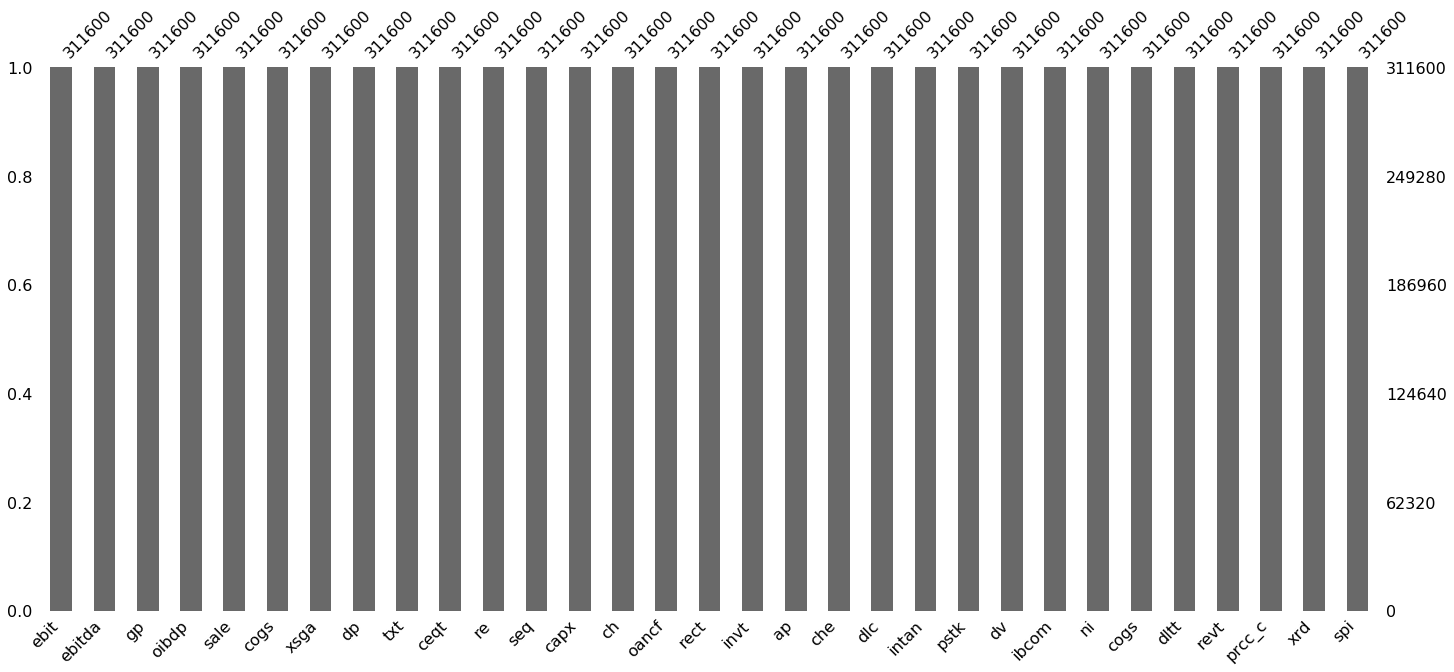

In [48]:
msgn.bar(df3[config['step1']])

### Use the imuputed variables to build models for the dependent variables

In [56]:
y = df3[config['step2'][0][0]][df3[config['step2'][0][0]].notnull()]
x = np.array(df3[config['step2'][0][1:]])
X = x[df3[config['step2'][0][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9999868300573163
0.9999859328553846


In [57]:
y = df3[config['step2'][0][0]][df3[config['step2'][0][0]].notnull()]
x = np.array(df3[config['step2'][0][1:]])
X = x[df3[config['step2'][0][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.8681082105960312
0.8651811422995456


In [60]:
df3[config['step2'][0][0]] = df3[config['step2'][0][0]].fillna(pred.pred)

In [62]:
y = df3[config['step2'][1][0]][df3[config['step2'][1][0]].notnull()]
x = np.array(df3[config['step2'][1][1:]])
X = x[df3[config['step2'][1][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.7477268008034412
0.6622426421238305


In [65]:
y = df3[config['step2'][1][0]][df3[config['step2'][1][0]].notnull()]
x = np.array(df3[config['step2'][1][1:]])
X = x[df3[config['step2'][1][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train,y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.6532017249559681
0.5620105176353354


In [66]:
df3[config['step2'][1][0]] = df3[config['step2'][1][0]].fillna(pred.pred)

In [67]:
y = df3[config['step2'][2][0]][df3[config['step2'][2][0]].notnull()]
x = np.array(df3[config['step2'][2][1:]])
X = x[df3[config['step2'][2][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.751550259285299
0.7484648228802975


In [68]:
y = df3[config['step2'][2][0]][df3[config['step2'][2][0]].notnull()]
x = np.array(df3[config['step2'][2][1:]])
X = x[df3[config['step2'][2][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.6763891325285544
0.700773370495908


In [69]:
df3[config['step2'][2][0]] = df3[config['step2'][2][0]].fillna(pred.pred)

In [70]:
y = df3[config['step2'][3][0]][df3[config['step2'][3][0]].notnull()]
x = np.array(df3[config['step2'][3][1:]])
X = x[df3[config['step2'][3][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9721070046514264
0.9787980204443653


In [71]:
y = df3[config['step2'][3][0]][df3[config['step2'][3][0]].notnull()]
x = np.array(df3[config['step2'][3][1:]])
X = x[df3[config['step2'][3][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.8777824639999086
0.8817815946779705


In [72]:
df3[config['step2'][3][0]] = df3[config['step2'][3][0]].fillna(pred.pred)

In [73]:
y = df3[config['step2'][4][0]][df3[config['step2'][4][0]].notnull()]
x = np.array(df3[config['step2'][4][1:]])
X = x[df3[config['step2'][4][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9339253920543046
0.8929712600419752


In [74]:
y = df3[config['step2'][4][0]][df3[config['step2'][4][0]].notnull()]
x = np.array(df3[config['step2'][4][1:]])
X = x[df3[config['step2'][4][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.7718001603562916
0.7312962833778209


In [75]:
df3[config['step2'][4][0]] = df3[config['step2'][4][0]].fillna(pred.pred)

In [78]:
y = df3[config['step2'][5][0]][df3[config['step2'][5][0]].notnull()]
x = np.array(df3[config['step2'][5][1:]])
X = x[df3[config['step2'][5][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.8719201862172083
0.8650416814324875


In [79]:
y = df3[config['step2'][5][0]][df3[config['step2'][5][0]].notnull()]
x = np.array(df3[config['step2'][5][1:]])
X = x[df3[config['step2'][5][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.7907947463344368
0.7913247284165102


In [80]:
df3[config['step2'][5][0]] = df3[config['step2'][5][0]].fillna(pred.pred)

In [81]:
y = df3[config['step2'][6][0]][df3[config['step2'][6][0]].notnull()]
x = np.array(df3[config['step2'][6][1:]])
X = x[df3[config['step2'][6][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.8982383082321886
0.8363833609796125


In [83]:
y = df3[config['step2'][6][0]][df3[config['step2'][6][0]].notnull()]
x = np.array(df3[config['step2'][6][1:]])
X = x[df3[config['step2'][6][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.9435726218673619
0.8870114555542681


In [84]:
df3[config['step2'][6][0]] = df3[config['step2'][6][0]].fillna(predr.predr)

In [86]:
y = df3[config['step2'][7][0]][df3[config['step2'][7][0]].notnull()]
x = np.array(df3[config['step2'][7][1:]])
X = x[df3[config['step2'][7][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.7492560937454258
0.8113724091307231


In [87]:
y = df3[config['step2'][7][0]][df3[config['step2'][7][0]].notnull()]
x = np.array(df3[config['step2'][7][1:]])
X = x[df3[config['step2'][7][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.6675934103108214
0.7056220870986585


In [88]:
df3[config['step2'][7][0]] = df3[config['step2'][7][0]].fillna(pred.pred)

In [89]:
y = df3[config['step2'][8][0]][df3[config['step2'][8][0]].notnull()]
x = np.array(df3[config['step2'][8][1:]])
X = x[df3[config['step2'][8][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9451576270484534
0.917484072560389


In [90]:
y = df3[config['step2'][8][0]][df3[config['step2'][8][0]].notnull()]
x = np.array(df3[config['step2'][8][1:]])
X = x[df3[config['step2'][8][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.7111082124496525
0.6748916991446542


In [91]:
df3[config['step2'][8][0]] = df3[config['step2'][8][0]].fillna(pred.pred)

In [92]:
y = df3[config['step2'][9][0]][df3[config['step2'][9][0]].notnull()]
x = np.array(df3[config['step2'][9][1:]])
X = x[df3[config['step2'][9][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9712702836999237
0.9662615487030645


In [94]:
y = df3[config['step2'][9][0]][df3[config['step2'][9][0]].notnull()]
x = np.array(df3[config['step2'][9][1:]])
X = x[df3[config['step2'][9][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.8271756421937441
0.8226527656355325


In [95]:
df3[config['step2'][9][0]] = df3[config['step2'][9][0]].fillna(pred.pred)

In [96]:
y = df3[config['step2'][10][0]][df3[config['step2'][10][0]].notnull()]
x = np.array(df3[config['step2'][10][1:]])
X = x[df3[config['step2'][10][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9961413753411837
0.9961346654130714


In [97]:
y = df3[config['step2'][10][0]][df3[config['step2'][10][0]].notnull()]
x = np.array(df3[config['step2'][10][1:]])
X = x[df3[config['step2'][10][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.9372948982564449
0.9382229643352578


In [98]:
df3[config['step2'][10][0]] = df3[config['step2'][10][0]].fillna(pred.pred)

In [99]:
y = df3[config['step2'][11][0]][df3[config['step2'][11][0]].notnull()]
x = np.array(df3[config['step2'][11][1:]])
X = x[df3[config['step2'][11][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.8084385265186878
0.8142723383540492


In [100]:
y = df3[config['step2'][11][0]][df3[config['step2'][11][0]].notnull()]
x = np.array(df3[config['step2'][11][1:]])
X = x[df3[config['step2'][11][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.7328659777837647
0.7203487066072812


In [101]:
df3[config['step2'][11][0]] = df3[config['step2'][11][0]].fillna(pred.pred)

In [103]:
y = df3[config['step2'][12][0]][df3[config['step2'][12][0]].notnull()]
x = np.array(df3[config['step2'][12][1:]])
X = x[df3[config['step2'][12][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9999965106405881
0.9999996456224021


In [104]:
y = df3[config['step2'][12][0]][df3[config['step2'][12][0]].notnull()]
x = np.array(df3[config['step2'][12][1:]])
X = x[df3[config['step2'][12][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.9016869741273352
0.8990239555679342


In [105]:
df3[config['step2'][12][0]] = df3[config['step2'][12][0]].fillna(pred.pred)

In [107]:
y = df3[config['step2'][13][0]][df3[config['step2'][13][0]].notnull()]
x = np.array(df3[config['step2'][13][1:]])
X = x[df3[config['step2'][13][0]].notnull()]
y = y.values.reshape(-1,1)
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
reg = LinearRegression().fit(x_train, y_train)
print(reg.score(x_train,y_train))
print(reg.score(x_test,y_test))
pred = pd.DataFrame(reg.predict(x),columns=['pred'])

0.9997742555789889
0.9999236266906918


In [108]:
y = df3[config['step2'][13][0]][df3[config['step2'][13][0]].notnull()]
x = np.array(df3[config['step2'][13][1:]])
X = x[df3[config['step2'][13][0]].notnull()]
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(x_train, y_train)
print(regr.score(x_train, y_train))
print(regr.score(x_test, y_test))
predr = pd.DataFrame(regr.predict(x),columns=['predr'])

0.9760492707800942
0.9377246020340029


In [109]:
df3[config['step2'][13][0]] = df3[config['step2'][13][0]].fillna(pred.pred)

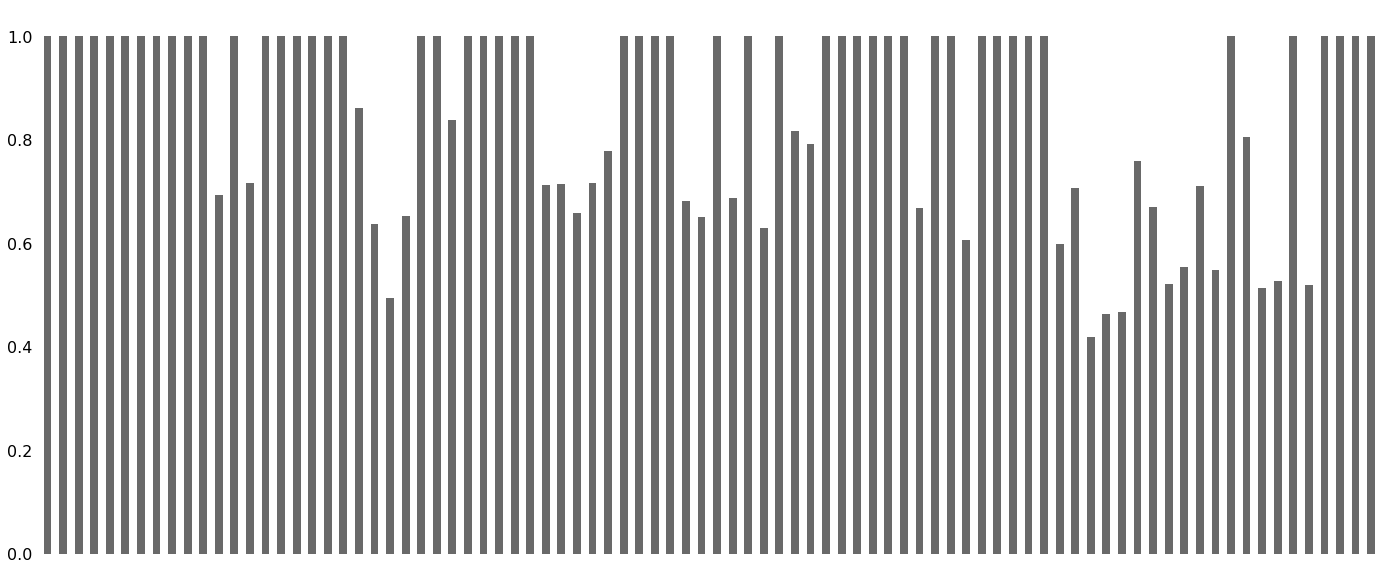

In [110]:
msgn.bar(df3)

In [122]:
%%time
df2 = imputer.fit_transform(df3.select_dtypes(include='float').iloc[:,1:])

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   39.7s remaining:  6.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   57.7s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.6min remaining: 23.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  1.9min remaining: 16.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.3min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  3.2min remaining: 28.5min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   36.4s remaining:  5.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   53.7s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   53.4s remaining:  8.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   28.9s remaining:  4.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.5s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   39.6s remaining:  6.0min
[Parall

Iteration: 0


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   49.3s remaining:  7.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.6min remaining: 23.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.2min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.1min remaining: 19.0min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.4min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  3.5min remaining: 31.7min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   38.7s remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   43.8s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   58.8s remaining:  8.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   33.7s remaining:  5.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   47.1s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   38.5s remaining:  5.8min
[Parall

Iteration: 1


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   55.7s remaining:  8.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.7min remaining: 24.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.4min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.2min remaining: 20.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.7min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  3.8min remaining: 33.9min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   44.9s remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  1.1min remaining:  9.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.3min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   27.5s remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   36.4s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.7s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   35.8s remaining:  5.4min
[Parall

Iteration: 2


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   47.0s remaining:  7.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   54.4s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.7min remaining: 23.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.9min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.1min remaining: 19.3min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.6min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  3.6min remaining: 32.8min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   41.2s remaining:  6.2min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   56.6s remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   31.5s remaining:  4.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   46.9s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   37.1s remaining:  5.6min
[Parall

Iteration: 3


[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   51.5s remaining:  7.7min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.8min remaining: 25.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  3.6min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  2.0min remaining: 18.4min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.6min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.2s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:  3.7min remaining: 33.0min
[Parall

[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   38.8s remaining:  5.8min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   44.0s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   56.5s remaining:  8.5min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.9s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   27.1s remaining:  4.1min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.9s finished
[Parallel(n_jobs=20)]: Done   2 out of  20 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=20)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Done   2 out of  20 | elapsed:   35.6s remaining:  5.3min
[Parall

Iteration: 4
Wall time: 4h 47min 29s


In [142]:
df3[df3.select_dtypes(include='float').iloc[:,1:].columns] = pd.DataFrame(df2)

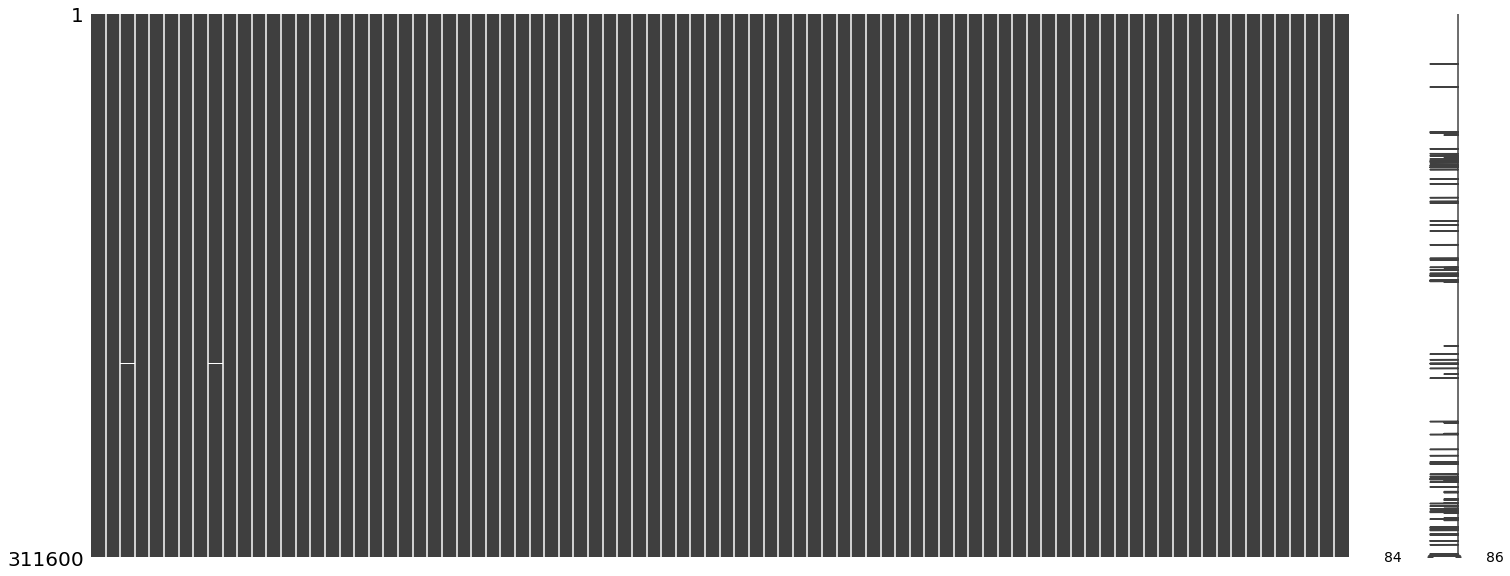

In [143]:
msgn.matrix(df3)

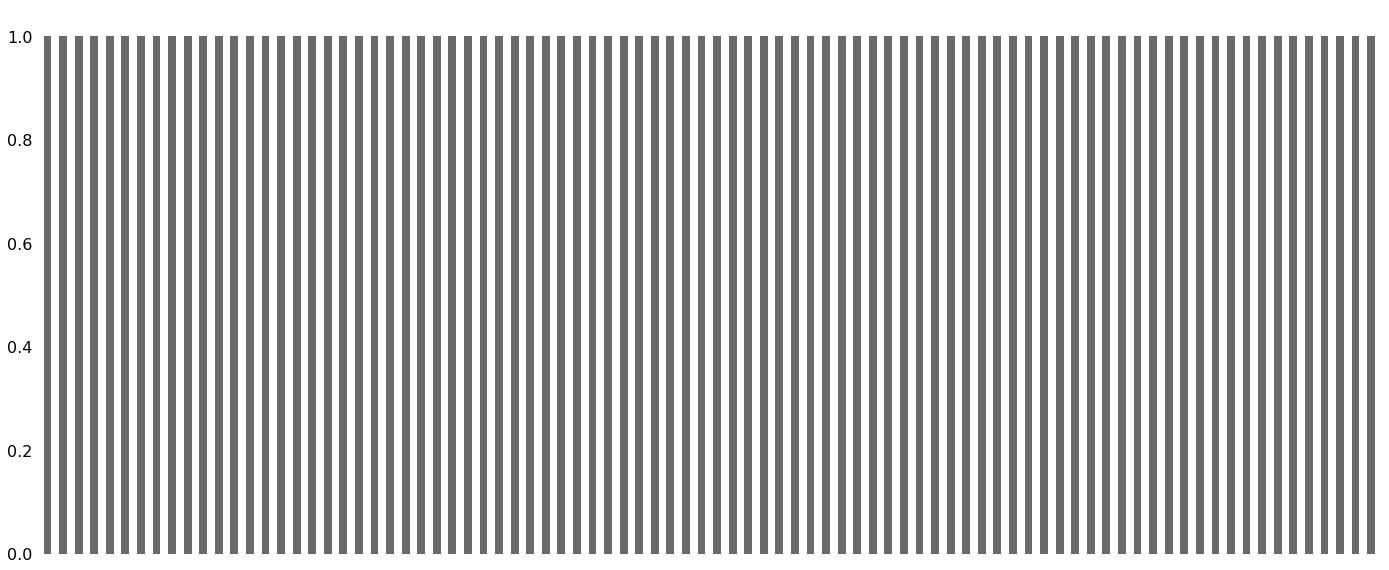

In [144]:
msgn.bar(df3)

In [147]:
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
missing_value_df

,column_name,percent_missing
gvkey,gvkey,0.000000
revt,revt,0.000000
rect,rect,0.000000
recch,recch,0.000000
re,re,0.000000
pstk,pstk,0.000000
prstkc,prstkc,0.000000
ppent,ppent,0.000000
pi,pi,0.000000
oibdp,oibdp,0.000000
